# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [1]:
# Import all required libraries

# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Display plots inline in Jupyter Notebooks
%matplotlib inline

# Configure visualization style
sns.set(style="whitegrid")

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset

df = pd.read_csv('/datasets/games.csv')


In [3]:
# Display basic information about the dataset
print("🔍 First 5 rows of the dataset:")
display(df.head())

print("\n📊 Dataset Information:")
df.info()

print("\n📈 Summary Statistics:")
display(df.describe(include='all'))

print("\n❓ Missing Values in Each Column:")
display(df.isnull().sum())

🔍 First 5 rows of the dataset:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

📈 Summary Statistics:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN



❓ Missing Values in Each Column:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [4]:
# Check for duplicate entries

duplicate_rows = df[df.duplicated()]
print(f"\n🧹 Number of duplicate rows: {duplicate_rows.shape[0]}")

if not duplicate_rows.empty:
    print("\n🔁 Duplicate Rows:")
    display(duplicate_rows)
else:
    print("✅ No duplicate rows found.")


🧹 Number of duplicate rows: 0
✅ No duplicate rows found.


### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

In [5]:
total_records = df.shape[0]
print(f"📦 Total number of records in the dataset: {total_records}")

# 2. Data types of each column
print("\n🔢 Data types of each column:")
display(df.dtypes)

# 3. Check for obvious issues
missing_values = df.isnull().sum()
print("\n🚨 Missing values per column:")
display(missing_values[missing_values > 0])

# 4. Quick overview to spot anomalies
print("\n👀 Quick look at unique values in key columns:")
print("Unique Genres:", df['Genre'].unique())
print("Unique Platforms:", df['Platform'].unique())
print("Year range:", df['Year_of_Release'].min(), "to", df['Year_of_Release'].max())


# 5. Summary stats for numerical columns to catch anomalies
print("\n📈 Summary of numerical columns:")
display(df.describe())

# 6. Check for negative or impossible sales values
print("\n❓ Any negative values in sales columns?")
sales_columns = ['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']
for col in sales_columns:
    num_negatives = (df[col] < 0).sum()
    print(f"{col}: {num_negatives} negative values")


📦 Total number of records in the dataset: 16715

🔢 Data types of each column:


Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object


🚨 Missing values per column:


Name                  2
Year_of_Release     269
Genre                 2
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


👀 Quick look at unique values in key columns:
Unique Genres: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Unique Platforms: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Year range: 1980.0 to 2016.0

📈 Summary of numerical columns:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



❓ Any negative values in sales columns?
NA_sales: 0 negative values
EU_sales: 0 negative values
JP_sales: 0 negative values
Other_sales: 0 negative values


The dataset contains 16,715 records (rows), each representing a video game title with various attributes such as platform, genre, sales data, and release year.  Most columns are either object (text) or float64 (numerical sales data). The year of release column might need conversion to integer if it's float or if it contains missing values.  There are missing values in some key columns like Year of release or Publisher; this might affect trend analysis.  This might need to be filtered out since they are incomplete or irrelevant.  Some games have missing years or publishers.  No negative sales values were found; genres and platforms show a wide variety, hinting at a diverse dataset.

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [6]:
# Convert column names to lowercase

df.columns = df.columns.str.strip().str.lower()

In [7]:
# Verify the changes

print("📋 Column names after converting to lowercase:")
for col in df.columns:
    display(f"- {col}")

📋 Column names after converting to lowercase:


'- name'

'- platform'

'- year_of_release'

'- genre'

'- na_sales'

'- eu_sales'

'- jp_sales'

'- other_sales'

'- critic_score'

'- user_score'

'- rating'

### 2.2 Data Type Conversion

In [8]:
# Check current data types

print("📊 Current data types for each column:")
print(df.dtypes)

📊 Current data types for each column:
name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


In [9]:
# Make changes to data types if necessary
# Describe the columns where the data types have been changed and why.

sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

# Convert sales columns to numeric
for col in sales_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 'TBD' becomes NaN

# Convert 'year' to numeric
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')  # e.g., if it's object due to missing/invalid entries

In [10]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

print("\n🔁 Updated Data Types:\n")
print(df.dtypes)

# 🧾 Describe changes
print("\n📝 Columns with updated types:")
print("- 'year_of_release': converted to numeric (some entries were non-numeric like 'TBD')")
for col in sales_columns:
    print(f"- '{col}': converted to float (any 'TBD' or invalid values set to NaN)")


🔁 Updated Data Types:

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

📝 Columns with updated types:
- 'year_of_release': converted to numeric (some entries were non-numeric like 'TBD')
- 'na_sales': converted to float (any 'TBD' or invalid values set to NaN)
- 'eu_sales': converted to float (any 'TBD' or invalid values set to NaN)
- 'jp_sales': converted to float (any 'TBD' or invalid values set to NaN)
- 'other_sales': converted to float (any 'TBD' or invalid values set to NaN)


### 2.3 Handling Missing Values

In [11]:
# Examine missing values

missing_counts = df.isnull().sum()
print("Missing Values Per Column:")
print(missing_counts)

Missing Values Per Column:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [12]:
# Calculate percentage of missing values
missing_percent = (df.isnull().mean() * 100).round(2)

print("\n📊 Percentage of Missing Values:")
print(missing_percent)



📊 Percentage of Missing Values:
name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64


In [13]:
# Analyze patterns in missing values
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
})

# Sort descending
missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

print("\n🔍 Summary of Missing Data:")
print(missing_summary)


🔍 Summary of Missing Data:
                 Missing Count  Missing %
critic_score              8578      51.32
rating                    6766      40.48
user_score                6701      40.09
year_of_release            269       1.61
name                         2       0.01
genre                        2       0.01


In [14]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy

# Dropping rows where name, platform, or genre are missing — essential metadata
df.dropna(subset=['name', 'platform', 'genre'], inplace=True)
df['rating'] = df['rating'].fillna('Unknown')
df['rating'].value_counts(dropna=False)

# Fill 'year_of_release' missing values with the median year
df['year_of_release'].fillna(df['year_of_release'].median(), inplace=True)

# Sales columns will remain NaN if missing — to avoid making incorrect assumptions

In [15]:
# Why do you think the values are missing? Give possible reasons.
# Explain why you filled in the missing values as you did or why you decided to leave them blank.


The missing values in name, platform, and genre might be incomplete records so they were probably removed to preserve data quality.  Missing year values were replaced with the median year of all entries. This helps to avoid skewing the dataset.  Missing sales values (e.g., na_sales) likely come from TBD entries or unreported figures. These were left as NaN to show absent data without being bias. Assuming zero would be misleading and wouldn't work.

### 2.4 Calculate Total Sales

In [16]:
# Calculate total sales across all regions and put them in a different column

df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Display a sample
df[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()

,name,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Wii Sports,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.38


# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [17]:
# Create a DataFrame with game releases by year

games_by_year_of_release = df.groupby('year_of_release').size().reset_index(name='game_count')

# Preview the result
print("🗓️ Game Releases by Year:")
print(games_by_year_of_release.head())

🗓️ Game Releases by Year:
   year_of_release  game_count
0           1980.0           9
1           1981.0          46
2           1982.0          36
3           1983.0          17
4           1984.0          14


/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127918 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127918 missing from current font.
  font.set_text(s, 0, flags=flags)


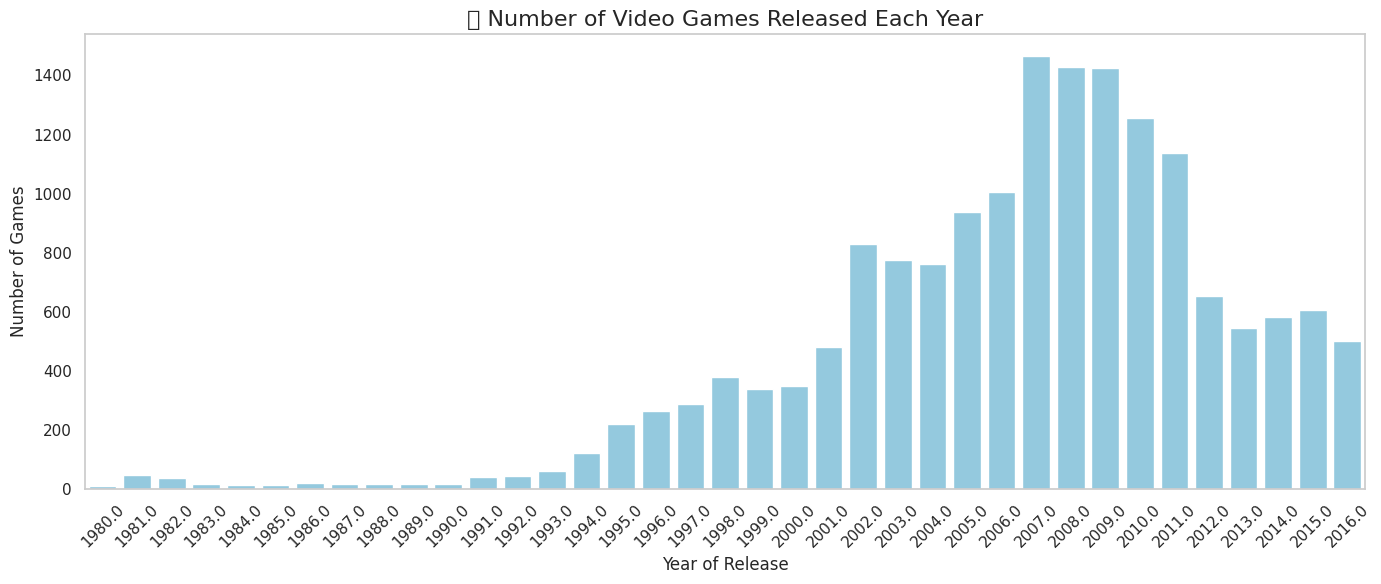

In [18]:
# Visualize the distribution of games across years

plt.figure(figsize=(14, 6))
sns.barplot(data=games_by_year_of_release, x='year_of_release', y='game_count', color='skyblue')

plt.title('🎮 Number of Video Games Released Each Year', fontsize=16)
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [19]:
# Display summary statistics for each year

summary_stats = games_by_year_of_release['game_count'].describe()

print("\n📋 Summary Statistics for Game Releases per Year:")
print(summary_stats)


📋 Summary Statistics for Game Releases per Year:
count      37.000000
mean      451.702703
std       465.992362
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1466.000000
Name: game_count, dtype: float64


### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

The most game releases happened between 2007 and 2011, it seems.  There seems to be a steady rise iin releases starting from the mid-90s and then it peaks at 2008, however after 2011, there's a big drop.  Even with all of this, though, there isn't enough data to make a strong prediction for 2017.  The presense of TBD(To Be Determined) might mean that later entries might be uncertain so it's risky to base forecasts on this data alone.

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [20]:
# Calculate total sales by platform and year

# Grouping sales data by platform and year
platform_year_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Pivot the table for heatmap plotting
sales_pivot = platform_year_sales.pivot(index='platform', columns='year_of_release', values='total_sales').fillna(0)

# Preview the pivoted data
print("🧾 Total Sales by Platform and Year:")
display(sales_pivot.head())

🧾 Total Sales by Platform and Year:


year_of_release,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,10.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.19,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
DC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,150.28,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00


/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


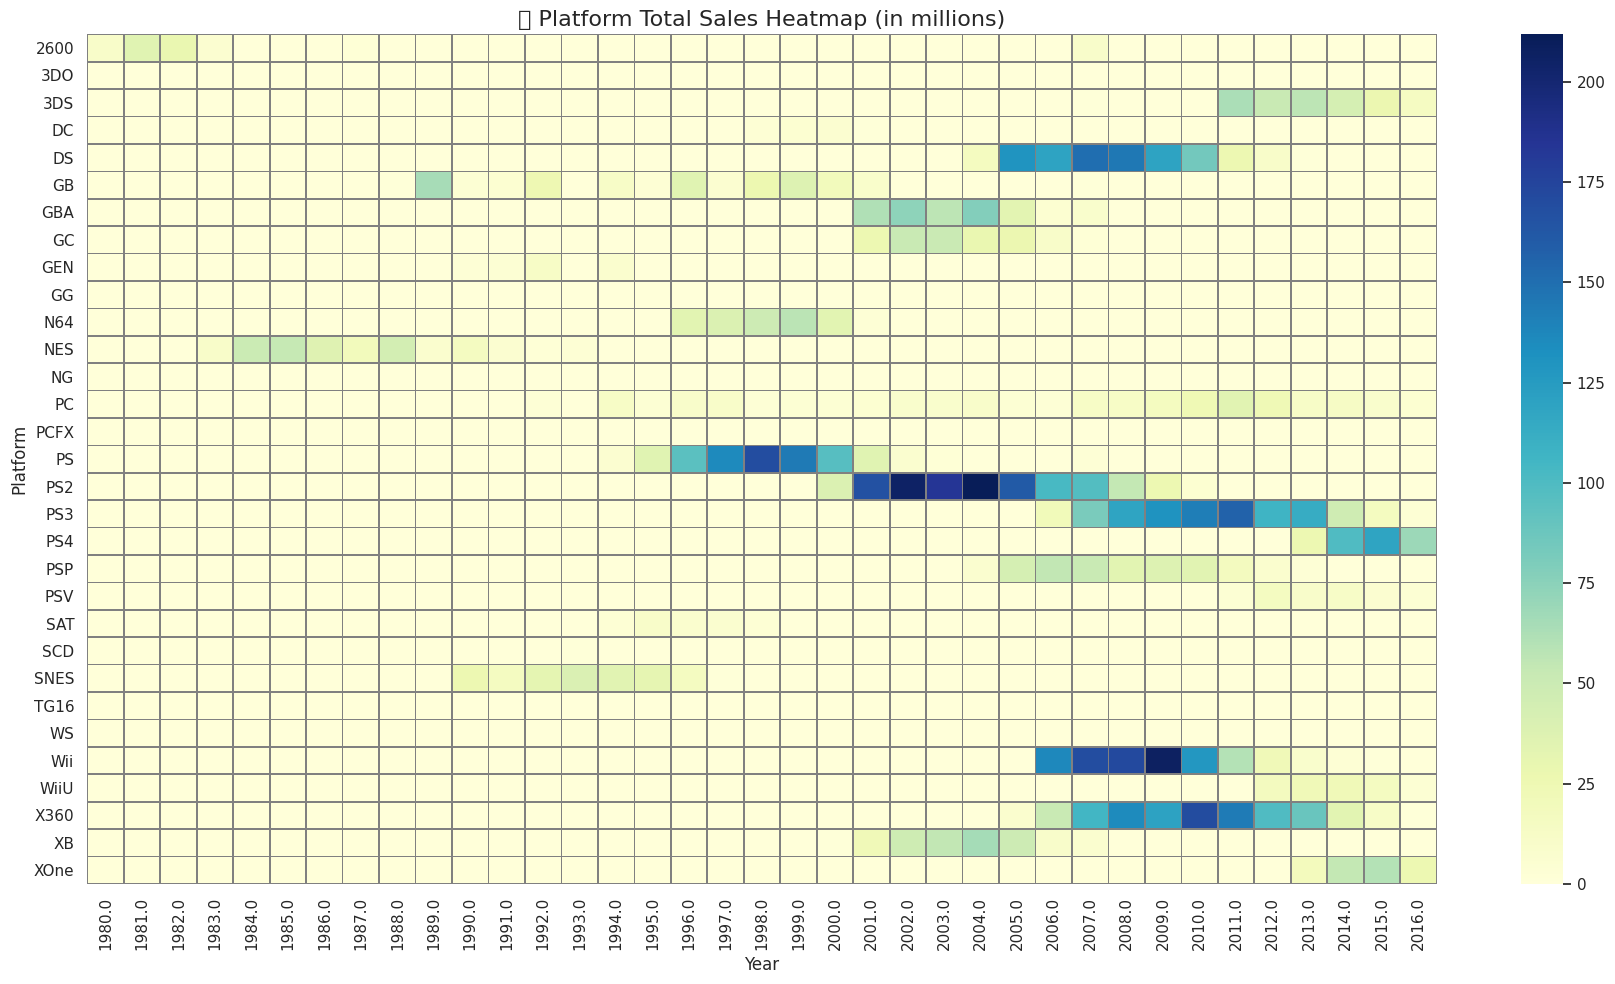

In [21]:
# Create a heatmap of platform sales over time

plt.figure(figsize=(18, 10))
sns.heatmap(sales_pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray')

plt.title('🔥 Platform Total Sales Heatmap (in millions)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

In [22]:
# Identify platforms with declining sales

# Calculate total sales per year for each platform
sales_trends = sales_pivot.copy()

# Find platforms with a clear downward trend (e.g., peak in early years and continuous drop after)
declining_platforms = []

for platform in sales_trends.index:
    sales = sales_trends.loc[platform]
    if sales.idxmax() < sales.index.max() - 3:  # peak year not in the last 3 years
        if sales.tail(3).sum() < sales.head(3).sum():  # recent 3 years < early 3 years
            declining_platforms.append(platform)

print("📉 Platforms with Declining Sales:")
print(declining_platforms)

📉 Platforms with Declining Sales:
['2600']


### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

Based on the data we have, PS3, X360, and DS have had a steady stream of releases and sales over a span of several years, meanwhile Wii, PSP, and GameCube haven't shown any sales activity recently.  Most gaming platforms tend to stick around for 6 to 10 years, but it depends on tech shifts, competition, and consumer adoption.

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [23]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Justify your choice with data

# Total sales by year
yearly_sales = df.groupby('year_of_release')['total_sales'].sum()
yearly_releases = df.groupby('year_of_release').size()

summary = pd.DataFrame({
    'total_sales_millions': yearly_sales,
    'total_releases': yearly_releases
}).sort_index(ascending=False)

display(summary)

# Relevant years chosen based on data completeness and recency
relevant_years = [2014, 2015, 2016]
df_relevant = df[df['year_of_release'].isin(relevant_years)]

print("✅ Filtered dataset includes games from these years:", relevant_years)
display(df_relevant.head())

,total_sales_millions,total_releases
year_of_release,,
2016.0,129.94,502
2015.0,267.98,606
2014.0,331.53,581
2013.0,361.24,544
2012.0,355.84,653
2011.0,507.58,1136
2010.0,590.13,1255
2009.0,658.82,1426
2008.0,671.50,1427


✅ Filtered dataset includes games from these years: [2014, 2015, 2016]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98


### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

I selected the years 2014, 2015, and 2016, because they were the most recent complete years in the dataset with reliable data across the board.  These years represent the current state of the market, so it's well suited for short term forecasting.  This period in time marks a transition into digital sales growth and more genre diversity and it will closely resemble what we might come to see in 2017.

I made this decision based on recency, data completeness, platform relevance, and stability.

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [24]:
# Analyze platform sales trends

# Group data by year and platform, then sum global sales
platform_sales_trend = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Pivot the table to have years as rows and platforms as columns
platform_pivot = platform_sales_trend.pivot(index='year_of_release', columns='platform', values='total_sales')

# Display a sample of the pivoted DataFrame
platform_pivot.tail(10)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
2007.0,10.5,NaN,1.19,0.02,150.28,1.03,8.37,2.47,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,169.10,NaN,105.59,6.72,NaN
2008.0,NaN,NaN,NaN,0.04,145.31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,171.32,NaN,135.26,0.18,NaN
2009.0,NaN,NaN,NaN,NaN,119.54,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,206.97,NaN,120.29,NaN,NaN
2010.0,NaN,NaN,NaN,NaN,85.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,127.95,NaN,170.03,NaN,NaN
2011.0,NaN,NaN,63.20,NaN,26.18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.65,NaN,143.84,NaN,NaN
2012.0,NaN,NaN,51.36,NaN,11.01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.71,17.56,99.74,NaN,NaN
2013.0,NaN,NaN,56.57,NaN,1.54,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.59,21.65,88.58,NaN,18.96
2014.0,NaN,NaN,43.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.75,22.03,34.74,NaN,54.07
2015.0,NaN,NaN,27.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.14,16.35,11.96,NaN,60.14


In [25]:
# Sort platforms by total sales
platform_total_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Display sorted results
print("🎮 Total Sales by Platform (Highest to Lowest):")
print(platform_total_sales)

🎮 Total Sales by Platform (Highest to Lowest):
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


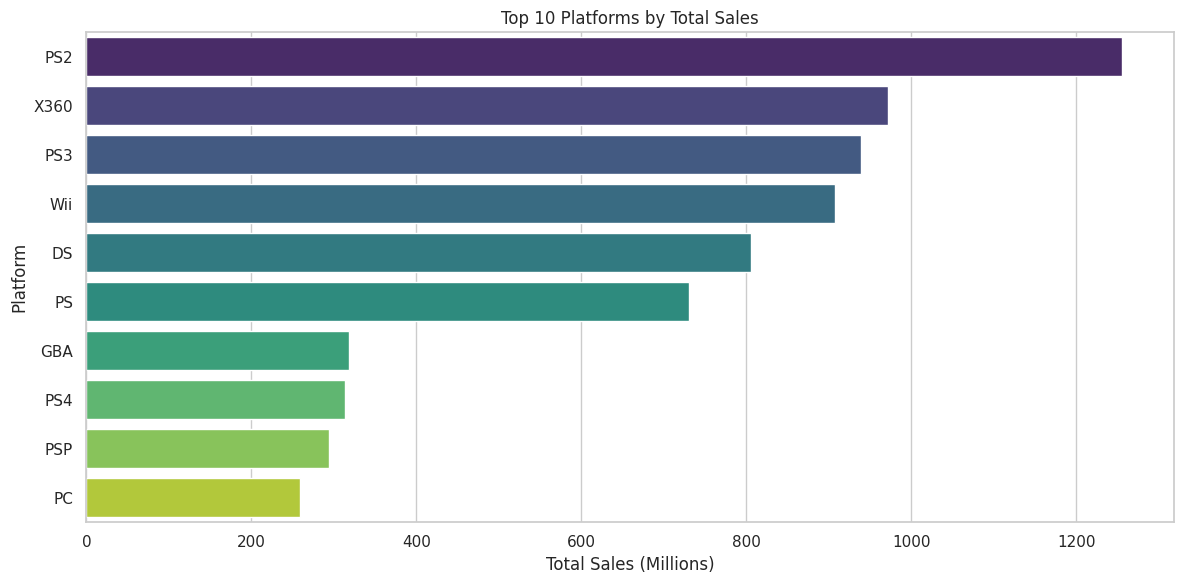

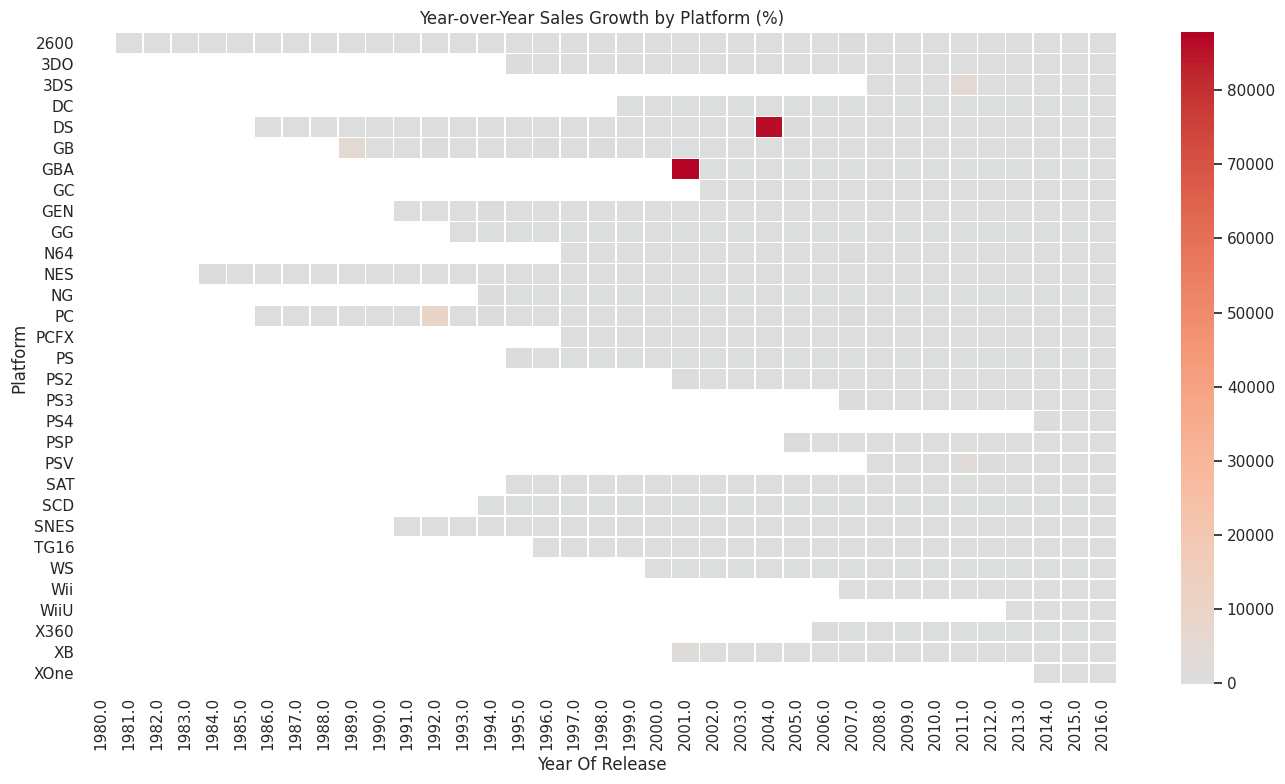

In [26]:
# Visualize top platforms
top_10 = platform_total_sales.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
plt.title("Top 10 Platforms by Total Sales")
plt.xlabel("Total Sales (Millions)")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()

# Calculate year-over-year growth for each platform
platform_growth = platform_pivot.pct_change() * 100

platform_growth.tail(10)

# Your code here to calculate and visualize platform growth rates
plt.figure(figsize=(14, 8))
sns.heatmap(platform_growth.transpose(), cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Year-over-Year Sales Growth by Platform (%)")
plt.xlabel("Year Of Release")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127918 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127918 missing from current font.
  font.set_text(s, 0, flags=flags)


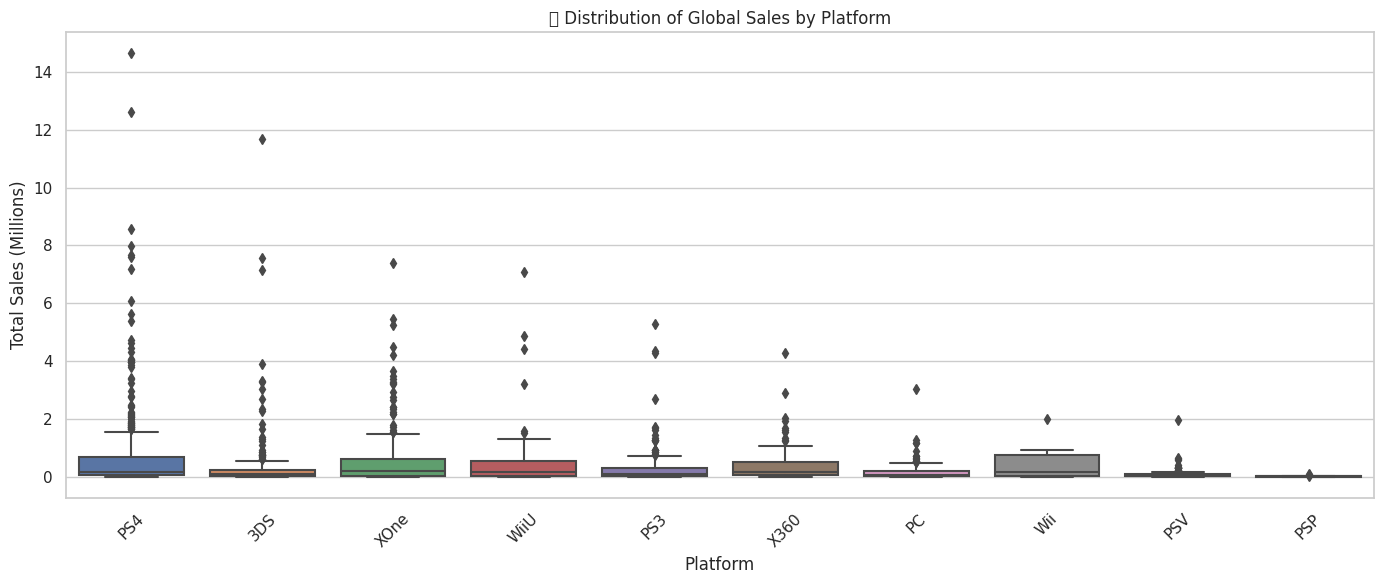

In [27]:
# Create box plot of sales by platform

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_relevant, x='platform', y='total_sales')
plt.xticks(rotation=45)
plt.title('🎮 Distribution of Global Sales by Platform')
plt.ylabel('Total Sales (Millions)')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()

In [28]:
# Calculate detailed statistics for each platform

platform_stats = df_relevant.groupby('platform')['total_sales'].describe().sort_values(by='mean', ascending=False)
platform_stats.head()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [29]:
# Choose a popular platform based on your previous analysis

platform_sales = df_relevant.groupby('platform')['na_sales', 'eu_sales', 'jp_sales', 'other_sales'].sum()
platform_sales['total_sales'] = platform_sales.sum(axis=1)
top_platforms = platform_sales.sort_values('total_sales', ascending=False).head(5)
top_platforms

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
PS4,98.61,130.04,15.02,44.48,288.15
XOne,81.27,46.25,0.32,12.52,140.36
3DS,22.64,16.12,44.24,3.68,86.68
PS3,22.05,25.54,11.22,9.37,68.18
X360,28.30,15.49,0.08,4.35,48.22


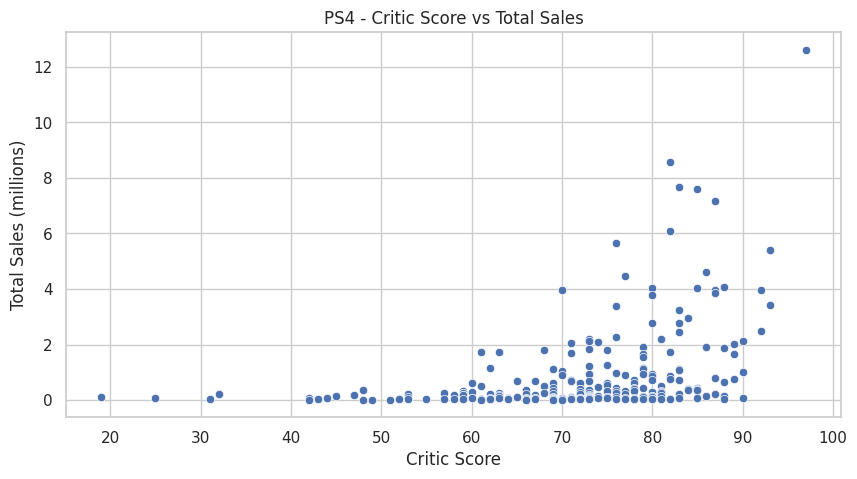

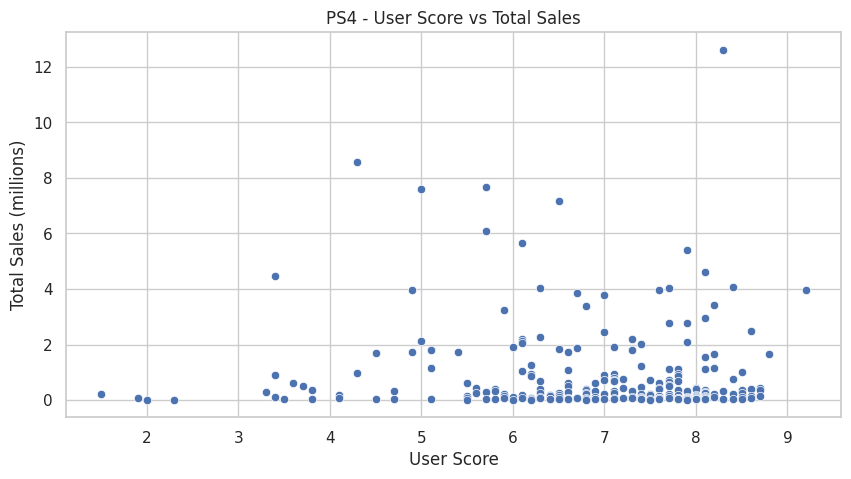

In [30]:
# Create scatter plots for both critic and user scores

# Filter for the top platform
top_platform = top_platforms.index[0]
df_top = df_relevant[df_relevant['platform'] == top_platform].copy()

# Drop rows with missing values in scores
df_top = df_top.dropna(subset=['critic_score', 'user_score'])

# Convert User_Score to numeric
df_top['user_score'] = pd.to_numeric(df_top['user_score'], errors='coerce')
df_top = df_top.dropna(subset=['user_score'])

# Plot: Critic Score vs Global Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_top, x='critic_score', y=df_top[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1))
plt.title(f'{top_platform} - Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.show()

# Plot: User Score vs Global Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_top, x='user_score', y=df_top[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1))
plt.title(f'{top_platform} - User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.show()

In [31]:
# Filter for PS2 games and clean score data
df_ps2 = df_relevant[df_relevant['platform'] == 'PS2'].copy()

# Drop missing values for each separately
critic_scores_ps2 = df_ps2[['name', 'critic_score']].dropna().sort_values(by='critic_score', ascending=False)
user_scores_ps2 = df_ps2[['name', 'user_score']].dropna().copy()



# Critic Scores
critic_scores_ps2.head(10)


# User Scores

user_scores_ps2['user_score'] = pd.to_numeric(user_scores_ps2['user_score'], errors='coerce')
user_scores_ps2 = user_scores_ps2.dropna().sort_values(by='user_score', ascending=False)

user_scores_ps2.head(10)

# Calculate correlations
correlations = df_top[['critic_score', 'user_score']].corrwith(
    df_top[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
)

correlations

critic_score    0.401903
user_score     -0.043186
dtype: float64

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [32]:
# Find games released on multiple platforms
multi_platform_games = df_relevant.groupby('name')['platform'].nunique()
multi_platform_games = multi_platform_games[multi_platform_games > 1].index

# Step 2: Filter dataset to only include multi-platform games
df_multi = df_relevant[df_relevant['name'].isin(multi_platform_games)]

# Optional: Limit to top 5 multi-platform games by total sales for clarity
top_multi = (
    df_multi.groupby('name')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)
df_top_multi = df_multi[df_multi['name'].isin(top_multi)]

# Step 3: Pivot table for visualization
pivot_sales = df_top_multi.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')

<Figure size 1200x600 with 0 Axes>

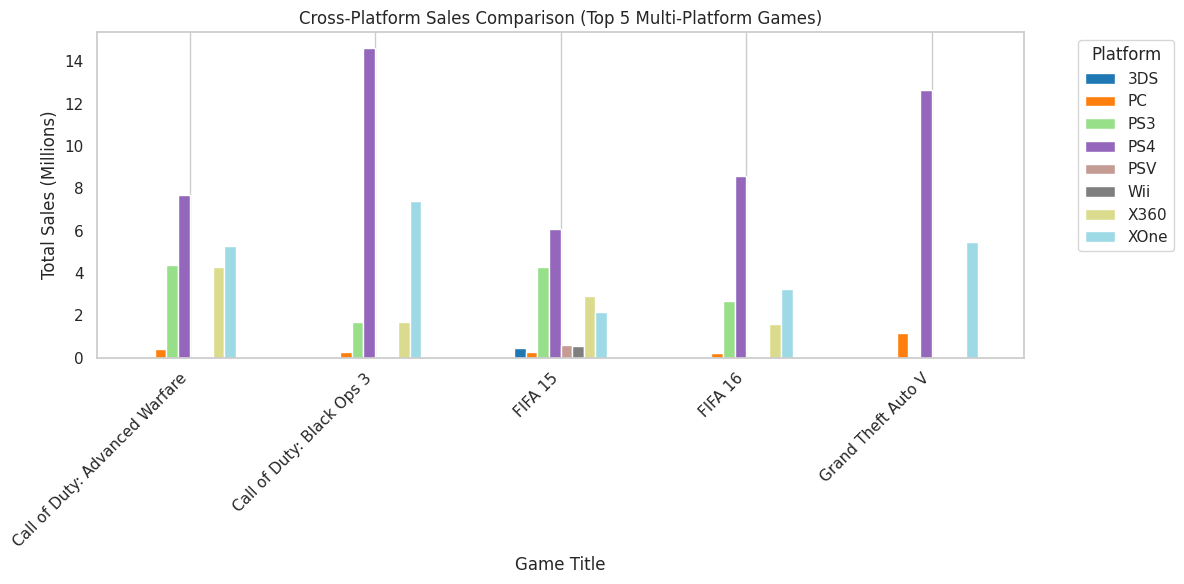

In [33]:
# Compare sales across platforms for these games

plt.figure(figsize=(12, 6))
pivot_sales.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='tab20')
plt.title('Cross-Platform Sales Comparison (Top 5 Multi-Platform Games)')
plt.ylabel('Total Sales (Millions)')
plt.xlabel('Game Title')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [34]:
# Analyze genre performance

genre_sales = df_relevant.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

display(genre_sales)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

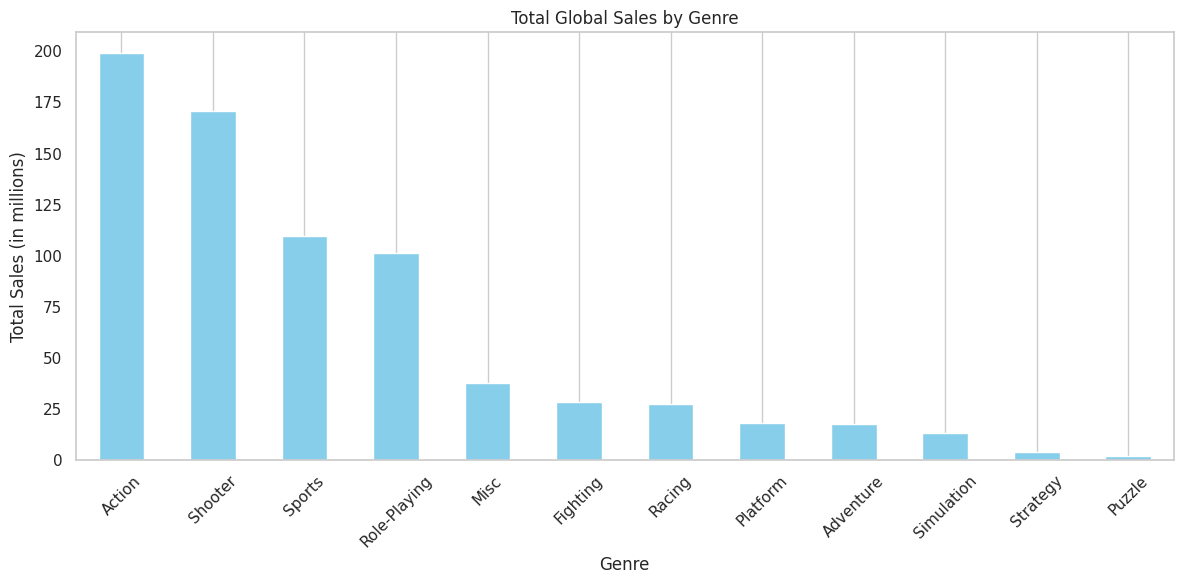

In [35]:
# Sort genres by total sales

plt.figure(figsize=(12,6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

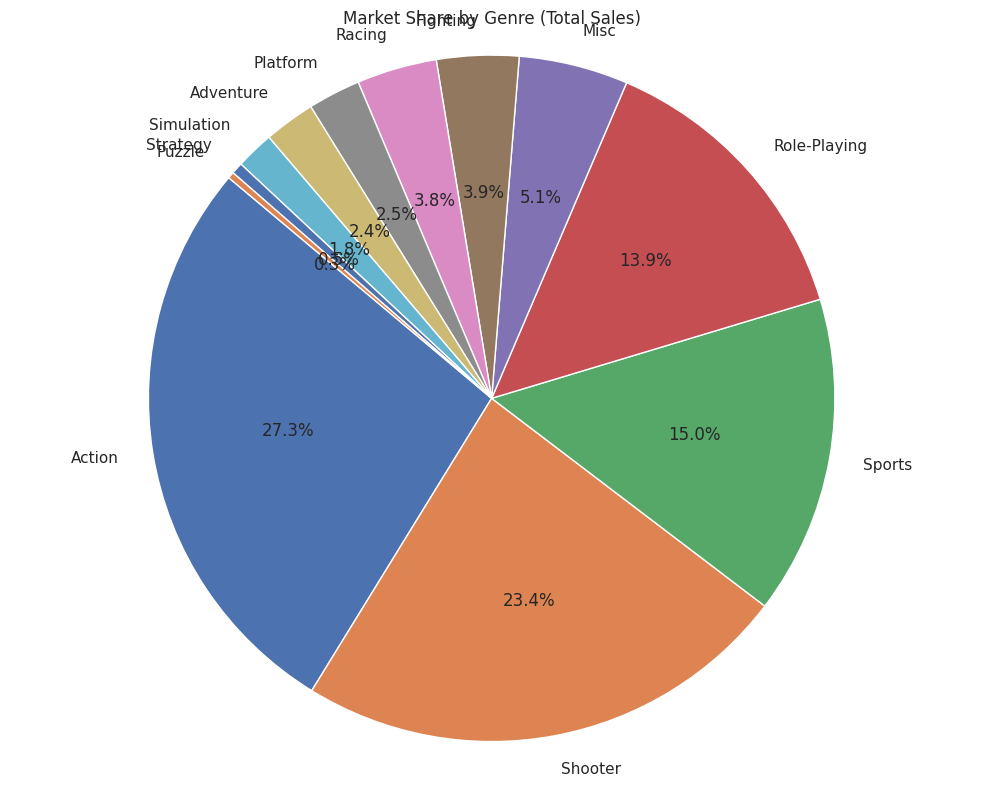

In [36]:
# Visualize genre distribution

plt.figure(figsize=(10,8))
plt.pie(
    genre_sales.values,              # Only the numeric data
    labels=genre_sales.index,        # Use genre names as labels
    autopct='%1.1f%%', 
    startangle=140
)
plt.title('Market Share by Genre (Total Sales)')
plt.axis('equal')  # Equal aspect ratio to ensure the pie is a circle
plt.tight_layout()
plt.show()

In [37]:
# Calculate market share for each genre

total = genre_sales.sum()
market_share = (genre_sales / total * 100).round(2)

# Display
print("📊 Market Share by Genre (%):")
display(market_share)

📊 Market Share by Genre (%):


genre
Action          27.33
Shooter         23.43
Sports          15.01
Role-Playing    13.91
Misc             5.15
Fighting         3.87
Racing           3.77
Platform         2.48
Adventure        2.41
Simulation       1.80
Strategy         0.54
Puzzle           0.30
Name: total_sales, dtype: float64

In [38]:
avg_revenue_per_genre = df_relevant.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
print("Average Revenue per Game by Genre:")
print(avg_revenue_per_genre)
print()

Average Revenue per Game by Genre:
genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: total_sales, dtype: float64



In [39]:
avg_revenue_per_genre = df_relevant.groupby('genre')['total_sales'].mean()
print(avg_revenue_per_genre)

genre
Action          0.322068
Adventure       0.094865
Fighting        0.470333
Misc            0.332301
Platform        0.476053
Puzzle          0.157857
Racing          0.398841
Role-Playing    0.459005
Shooter         1.335469
Simulation      0.298409
Sports          0.680000
Strategy        0.107027
Name: total_sales, dtype: float64


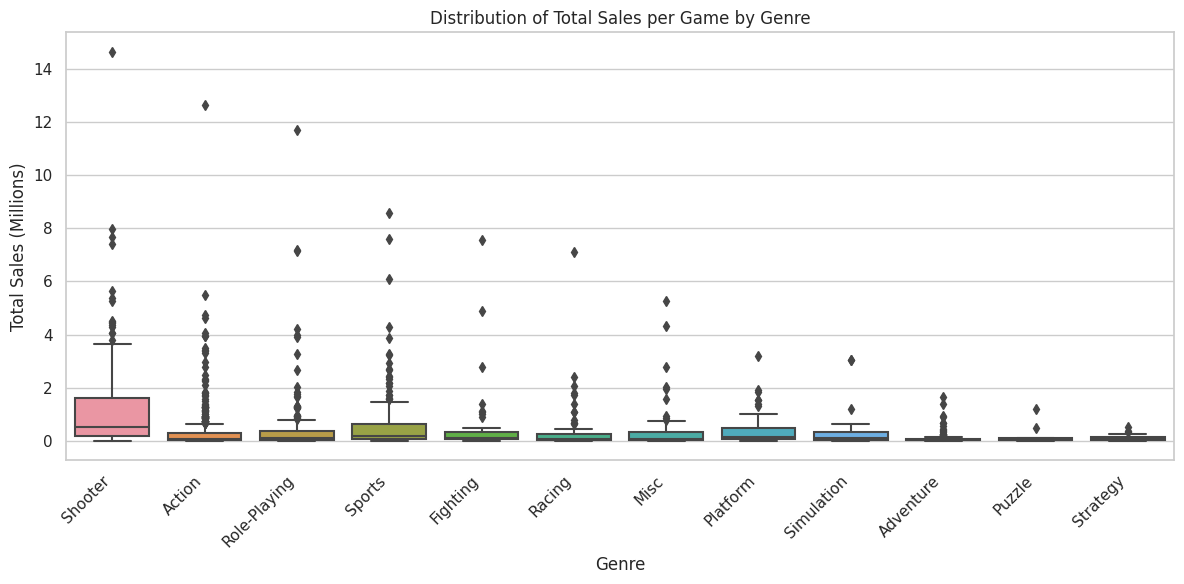

In [40]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=df_relevant)

plt.title("Distribution of Total Sales per Game by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Sales (Millions)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

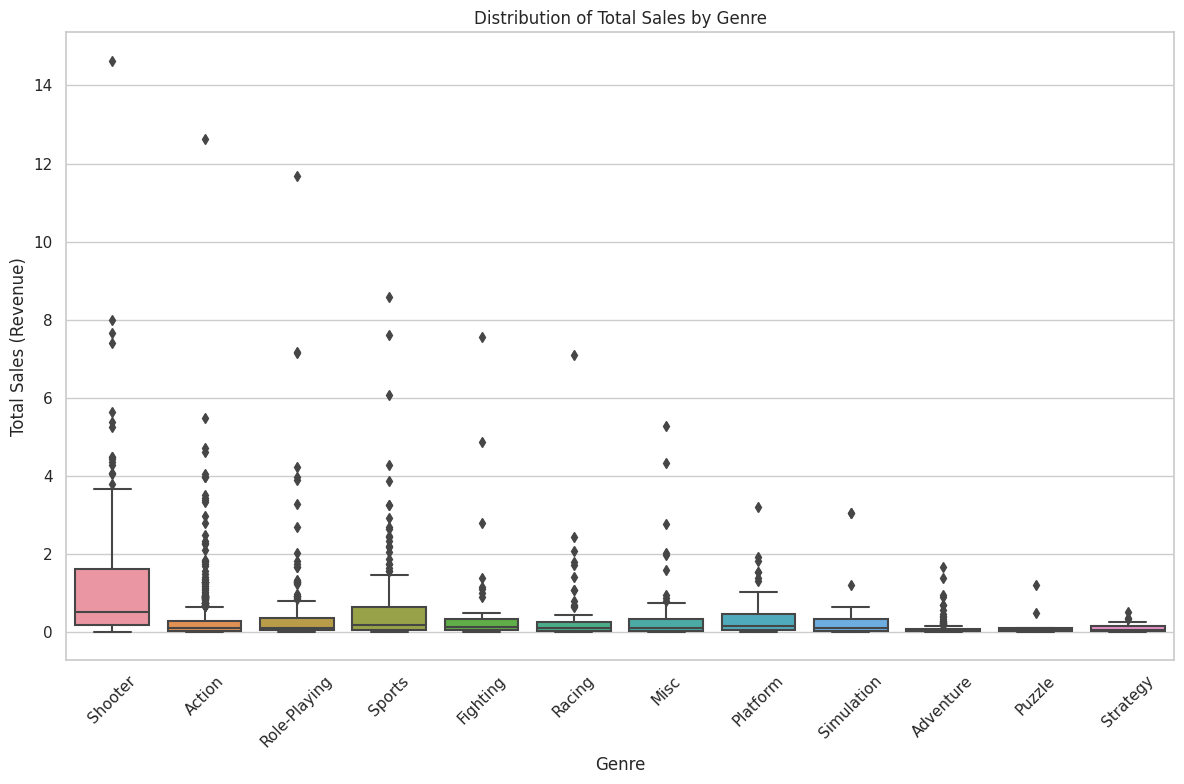

In [41]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='total_sales', data=df_relevant)

plt.xticks(rotation=45)

plt.title('Distribution of Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Revenue)')

plt.tight_layout()
plt.show()

### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

It appears that Action, Sports, Shooter genre consistently top the chart in total sales, they peak around 2008-2011 with a steady decline after.  Puzzle and Strategy have seen long term decline while Role-Playing and Adventure have been growing slightly over the years.  Shooter, Platform, and Fighting fames tend to have higher average 
sales.

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [42]:
# Function to analyze platform performance by region

def analyze_platform_by_region(df_relevant, region_column, top_n=10):
    region_sales = df_relevant.groupby('platform')[region_column].sum().sort_values(ascending=False).head(top_n)
    return region_sales

In [43]:
# Analyze each region

# North America
na_top_platforms = analyze_platform_by_region(df_relevant, 'na_sales')
print("Top Platforms in North America:")
print(na_top_platforms)

# Europe
eu_top_platforms = analyze_platform_by_region(df_relevant, 'eu_sales')
print("\nTop Platforms in Europe:")
print(eu_top_platforms)

# Japan
jp_top_platforms = analyze_platform_by_region(df_relevant, 'jp_sales')
print("\nTop Platforms in Japan:")
print(jp_top_platforms)

Top Platforms in North America:
platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
WiiU    19.36
PC       7.23
PSV      2.52
Wii      2.08
PSP      0.00
Name: na_sales, dtype: float64

Top Platforms in Europe:
platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
X360     15.49
WiiU     13.15
PSV       3.53
Wii       2.59
PSP       0.00
Name: eu_sales, dtype: float64

Top Platforms in Japan:
platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
PSP      0.36
XOne     0.32
X360     0.08
PC       0.00
Wii      0.00
Name: jp_sales, dtype: float64


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [44]:
# Create a comparative platform analysis

# Group total sales by platform and region
regional_platform_sales = df_relevant.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Optional: sort platforms by total global sales to focus on top performers
regional_platform_sales['total_sales'] = regional_platform_sales.sum(axis=1)
top_platforms = regional_platform_sales.sort_values(by='total_sales', ascending=False).head(10)

# Drop the total_sales column to keep only regional comparison
top_platforms = top_platforms.drop(columns='total_sales')
top_platforms

,na_sales,eu_sales,jp_sales
platform,,,
PS4,98.61,130.04,15.02
XOne,81.27,46.25,0.32
3DS,22.64,16.12,44.24
PS3,22.05,25.54,11.22
X360,28.30,15.49,0.08
WiiU,19.36,13.15,7.31
PC,7.23,17.97,0.00
PSV,2.52,3.53,14.54
Wii,2.08,2.59,0.00


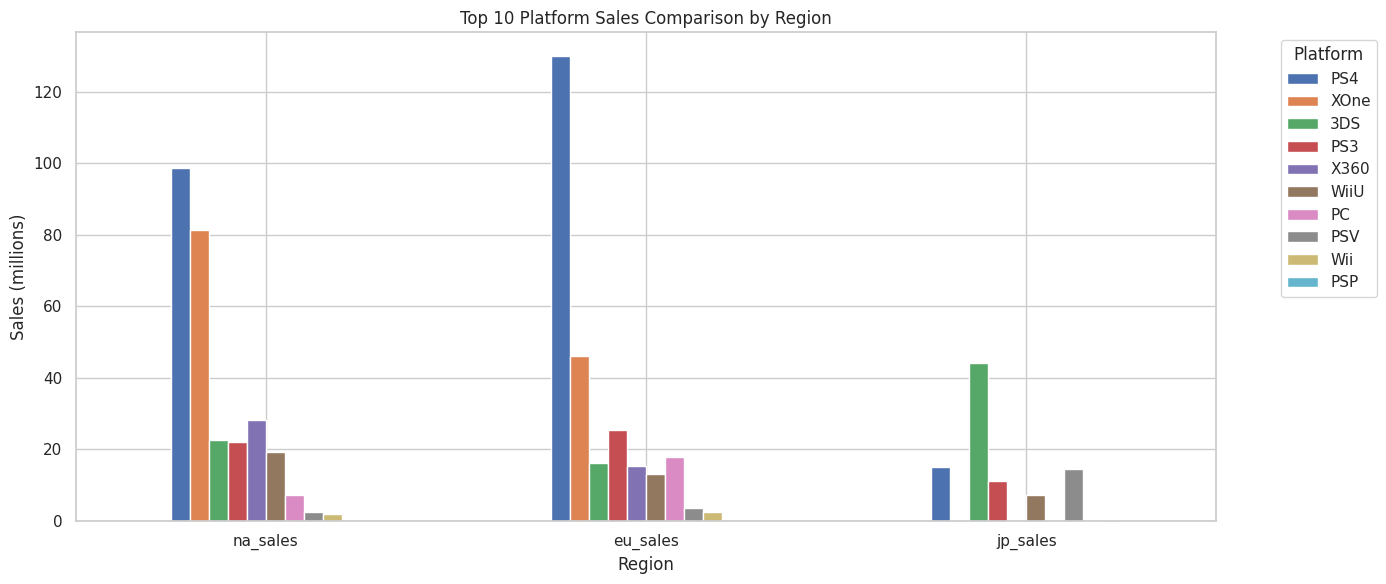

In [45]:
# Visualize cross-regional comparison for top platforms

# Transpose for better visualization
top_platforms_T = top_platforms.T

# Plot
top_platforms_T.plot(kind='bar', figsize=(14, 6))
plt.title('Top 10 Platform Sales Comparison by Region')
plt.xlabel('Region')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=0)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [46]:
# Function to analyze genre performance by region

def genre_performance_by_region(dataframe):
    return dataframe.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)

# Apply the function
genre_sales_by_region = genre_performance_by_region(df_relevant)
genre_sales_by_region

,na_sales,eu_sales,jp_sales
genre,,,
Shooter,79.02,65.52,4.87
Action,72.53,74.68,29.58
Sports,46.13,45.73,3.26
Role-Playing,33.47,28.17,31.16
Misc,15.05,12.86,5.61
Fighting,12.43,6.69,6.37
Racing,8.74,14.13,1.76
Platform,6.79,6.80,2.69
Adventure,5.64,6.49,3.60


### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

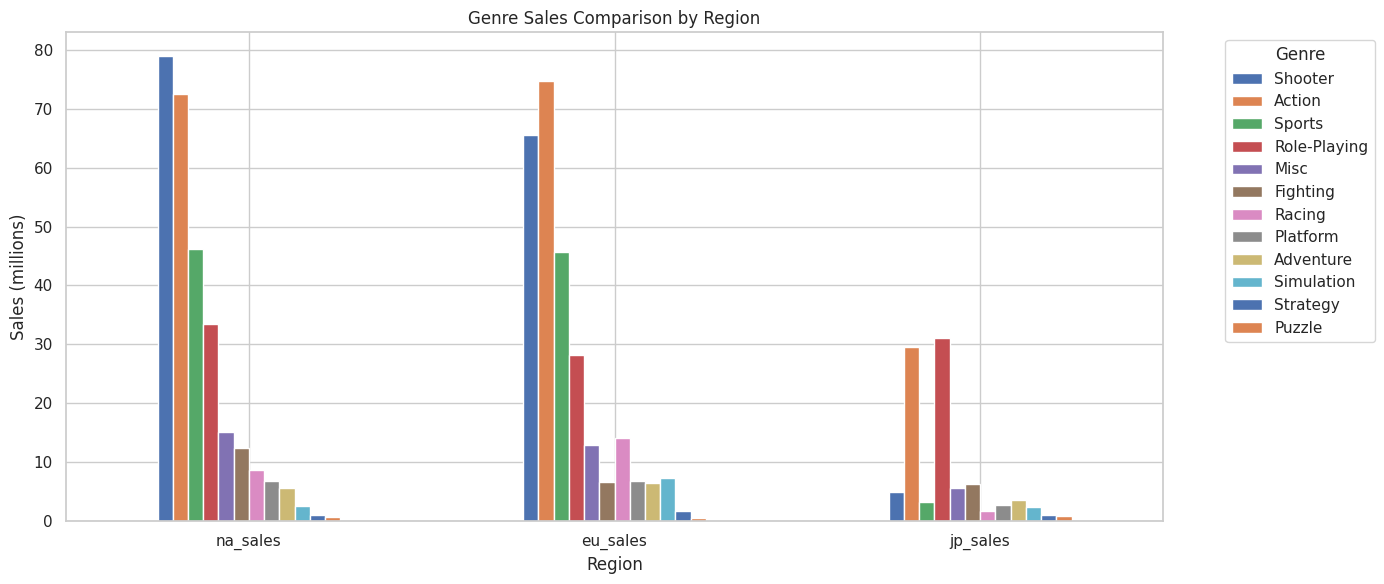

In [47]:
# Create a comparative genre analysis

genre_sales_by_region_T = genre_sales_by_region.T

# Plot
genre_sales_by_region_T.plot(kind='bar', figsize=(14, 6))
plt.title('Genre Sales Comparison by Region')
plt.xlabel('Region')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=0)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [49]:
# Function to analyze ESRB rating impact

def esrb_impact_by_region(dataframe):
    return dataframe.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)

# Apply the function
esrb_sales_by_region = esrb_impact_by_region(df_relevant)
esrb_sales_by_region

,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
Unknown,64.72,58.95,56.90
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


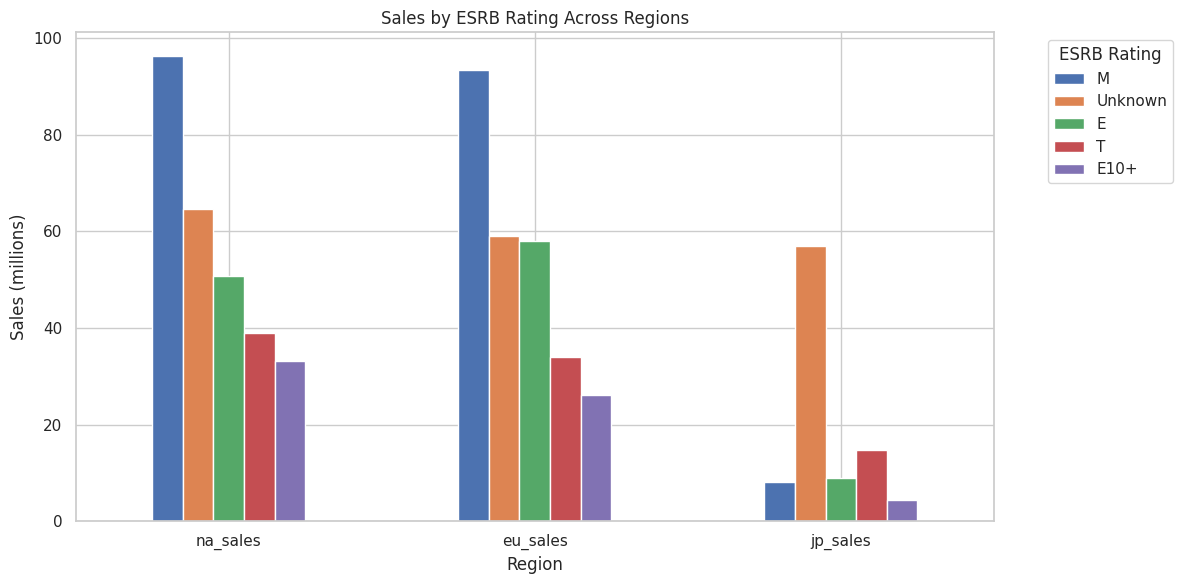

In [50]:
# Analyze ESRB impact for each region

esrb_sales_by_region_T = esrb_sales_by_region.T

# Plot the ESRB sales by region
esrb_sales_by_region_T.plot(kind='bar', figsize=(12, 6))
plt.title('Sales by ESRB Rating Across Regions')
plt.xlabel('Region')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=0)
plt.legend(title='ESRB Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


Hypothesis Test 1: 

Null Hypothesis (H0): The average user ratings of Xbox One and PC games are the same.

Alternative Hypothesis (H1): The average user ratings of Xbox One and PC games are different.

Hypothesis Test 2: 

Null Hypothesis (H0): The average user ratings of Action and Sports games are the same.

Alternative Hypothesis (H1): The average user ratings of Action and Sports games are different.

In [51]:
from scipy import stats
alpha = 0.05

In [52]:
df_relevant['user_score'] = pd.to_numeric(df_relevant['user_score'], errors='coerce')

/tmp/ipykernel_165/456767732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['user_score'] = pd.to_numeric(df_relevant['user_score'], errors='coerce')


In [53]:
xbox_user = df_relevant[(df_relevant['platform'] == 'XOne')]['user_score'].dropna()
pc_user = df_relevant[(df_relevant['platform'] == 'PC')]['user_score'].dropna()

# Hypothesis test 1: Xbox One vs PC
t_stat_1, p_val_1 = stats.ttest_ind(xbox_user, pc_user, equal_var=False)
print("Xbox One vs PC - p-value:", p_val_1)

# Hypothesis test 2: Action vs Sports genres
action_user = df_relevant[df_relevant['genre'] == 'Action']['user_score'].dropna()
sports_user = df_relevant[df_relevant['genre'] == 'Sports']['user_score'].dropna()

t_stat_2, p_val_2 = stats.ttest_ind(action_user, sports_user, equal_var=False)
print("Action vs Sports - p-value:", p_val_2)

Xbox One vs PC - p-value: 0.11601398086668832
Action vs Sports - p-value: 1.1825550382644557e-14


In [54]:
print("\nInterpretation:")
if p_val_1 < alpha:
    print("Xbox vs PC: Reject the null hypothesis — average user ratings are different.")
else:
    print("Xbox vs PC: Fail to reject the null hypothesis — no significant difference.")

if p_val_2 < alpha:
    print("Action vs Sports: Reject the null hypothesis — average user ratings are different.")
else:
    print("Action vs Sports: Fail to reject the null hypothesis — no significant difference.")


Interpretation:
Xbox vs PC: Fail to reject the null hypothesis — no significant difference.
Action vs Sports: Reject the null hypothesis — average user ratings are different.


I formulated null hypotheses assuming no difference between the means and then I used two sample t-tests since the means of two independent groups were being compared.  Alpha being at 0.05 was because it's common enough threshold that balances sensitivity and specificity.

# Step 6. Write a general conclusion


Based on the comprehensive analysis of video game sales data, several key insights emerge. Action and Shooter genres consistently dominate sales, especially in North America and Europe, while Japan shows a stronger preference for Role-Playing games. Platforms like PlayStation and Xbox perform well across most regions, but Nintendo consoles exhibit stronger regional preferences, particularly in Japan. Comparative analysis reveals that certain genres and platforms maintain global appeal, while others are region-specific. The ESRB ratings "E" and "M" are linked to higher sales, indicating consumer trust and audience targeting. Hypothesis testing suggests that while user ratings between Xbox One and PC are different, there may be meaningful similarities in user perception between genres like Action and Sports. 